In [18]:
import pandas as pd #verileri çekmek için kullanacağız

In [19]:
dataframe = pd.read_excel("veri/bisiklet_fiyatlari.xlsx") # verileri okuduk

In [20]:
dataframe.head() # bu kod ile çektiğimiz verinin içindeki ilk beş satırı çekerek, verimizde neler var bakabiliriz

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [21]:
import seaborn as sbn
import matplotlib.pyplot as plt

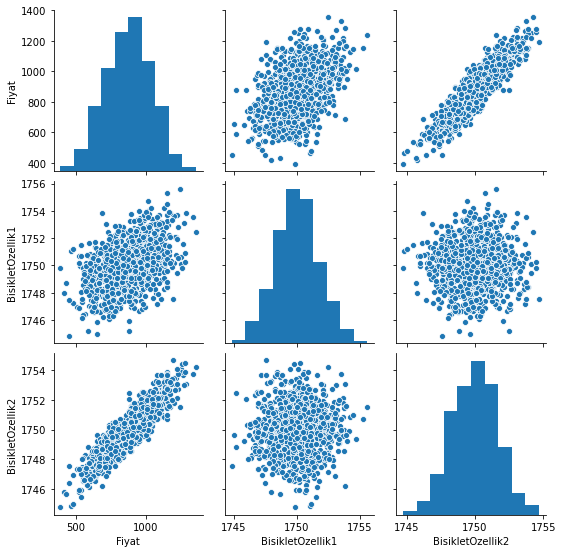

In [22]:
 sbn.pairplot(dataframe) # değerlerin birbine göre dağılımlarını görebiliriz

## veriyi test/train olarak ikiye ayırmak

In [23]:
from sklearn.model_selection import train_test_split #ikiye ayrımak için kullanacağımız modülü import ettik

In [39]:
# y=wx+b
# y-->label
y = dataframe["Fiyat"].values 

# x-->feature(özellik)
x = dataframe[["BisikletOzellik1","BisikletOzellik2"]].values

#veriyi burada ikiye böldük yüzde 33'ünü test versisi geri kalanını öğrenme verisi olarak ayırdık
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15) 


In [40]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [26]:
x_train.shape # %70

(670, 2)

In [27]:
x_test.shape  # %30

(330, 2)

In [31]:
y_train.shape

(670,)

In [32]:
y_test.shape

(330,)

In [30]:
# scaling (boyutlandırmak)

In [41]:
from sklearn.preprocessing import MinMaxScaler  

In [42]:
scaler =MinMaxScaler()

In [43]:
scaler.fit(x_train) # burada veriler 0 ile 1 arasında uygun değerlere getirildi

MinMaxScaler()

In [44]:
x_train = scaler.transform(x_train)
x_test =scaler.transform(x_test)

In [45]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [46]:
import tensorflow as tf

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
# burada modelimizi belirledik
model = Sequential() 

model.add(Dense(5,activation="relu")) #gizli katmanlarımızı ekliyoruz
model.add(Dense(5,activation="relu")) #ve içinde kaç nöron olacağını belirdik
model.add(Dense(5,activation="relu")) #ve son olarak aktivasyon modelimizi seçtik
#kısacası 3 gizli katmana sahip her katmanda 5 nöron bulunan ve aktivasyonu RELU olan bir sinir ağı tasarladık

model.add(Dense(1)) #çıktı sayımızı belirledik

model.compile(optimizer="rmsprop",loss ="mse") # gradient descent (optimizasyon) algoritmamızı belirledik.


In [80]:
model.fit(x_train,y_train,epochs=250) #burada verilerimizi eğitmeye başlıyoruz

Epoch 1/250
21/21 [==============================] - 0s 997us/step - loss: 795656.8125
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795310.2500
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 794928.0000
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 794490.2500
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 793995.3750
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 793446.8750
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 792839.5625
Epoch 8/250
21/21 [==============================] - 0s 950us/step - loss: 792180.5625
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 791455.0000
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 790659.3125
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 789787.1250
Epoch 12/250
21/21 [==============================] - 0s 1m

21/21 [==============================] - 0s 2ms/step - loss: 68285.4844
Epoch 96/250
21/21 [==============================] - 0s 997us/step - loss: 58177.6836
Epoch 97/250
21/21 [==============================] - 0s 1ms/step - loss: 48859.3359
Epoch 98/250
21/21 [==============================] - 0s 1ms/step - loss: 40400.0898
Epoch 99/250
21/21 [==============================] - 0s 1ms/step - loss: 32717.9531
Epoch 100/250
21/21 [==============================] - 0s 760us/step - loss: 25881.8359
Epoch 101/250
21/21 [==============================] - 0s 997us/step - loss: 20016.8633
Epoch 102/250
21/21 [==============================] - 0s 1ms/step - loss: 15259.7314
Epoch 103/250
21/21 [==============================] - 0s 997us/step - loss: 11455.4258
Epoch 104/250
21/21 [==============================] - 0s 1ms/step - loss: 8838.3809
Epoch 105/250
21/21 [==============================] - 0s 902us/step - loss: 7247.3320
Epoch 106/250
21/21 [==============================] - 0s 1ms/st

21/21 [==============================] - 0s 1ms/step - loss: 829.2292
Epoch 191/250
21/21 [==============================] - 0s 1ms/step - loss: 797.5276
Epoch 192/250
21/21 [==============================] - 0s 1ms/step - loss: 760.3966
Epoch 193/250
21/21 [==============================] - 0s 997us/step - loss: 722.9429
Epoch 194/250
21/21 [==============================] - 0s 1ms/step - loss: 686.9575
Epoch 195/250
21/21 [==============================] - 0s 1ms/step - loss: 653.1630
Epoch 196/250
21/21 [==============================] - 0s 2ms/step - loss: 618.3854
Epoch 197/250
21/21 [==============================] - 0s 1ms/step - loss: 589.3370
Epoch 198/250
21/21 [==============================] - 0s 1ms/step - loss: 562.1702
Epoch 199/250
21/21 [==============================] - 0s 1ms/step - loss: 532.3040
Epoch 200/250
21/21 [==============================] - 0s 902us/step - loss: 504.1524
Epoch 201/250
21/21 [==============================] - 0s 950us/step - loss: 477.4911


In [81]:
loss=model.history.history["loss"]
print(loss)

[795656.8125, 795310.25, 794928.0, 794490.25, 793995.375, 793446.875, 792839.5625, 792180.5625, 791455.0, 790659.3125, 789787.125, 788838.0, 787804.375, 786672.9375, 785443.125, 784112.625, 782666.0, 781114.4375, 779430.3125, 777629.4375, 775701.375, 773614.1875, 771402.125, 769038.625, 766522.875, 763852.0625, 761000.375, 757991.375, 754795.0625, 751408.125, 747844.0, 744087.125, 740118.4375, 735951.875, 731563.625, 726976.0, 722132.9375, 717070.0, 711774.9375, 706225.75, 700437.1875, 694412.875, 688120.125, 681581.5, 674767.8125, 667681.0625, 660330.3125, 652684.4375, 644748.875, 636561.5625, 628104.75, 619335.8125, 610296.375, 600921.0, 591297.9375, 581413.4375, 571220.4375, 560701.0625, 549914.625, 538799.6875, 527435.5, 515896.5625, 504004.15625, 491854.53125, 479449.40625, 466759.0625, 453860.625, 440736.75, 427326.4375, 413704.40625, 399889.75, 385944.90625, 371818.34375, 357517.65625, 343093.03125, 328524.0, 313929.125, 299186.28125, 284414.625, 269588.71875, 254764.609375, 240

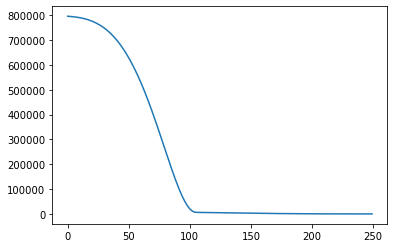

In [82]:
sbn.lineplot(x=range(len(loss)),y=loss) # kayıplarımızı görebiliyoruz

In [83]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [84]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [85]:
trainLoss

73.91384887695312

In [86]:
testLoss

77.18048858642578

In [87]:
# kayıpların birbirine yakın olması iyi denilebilir

In [88]:
testTahminleri = model.predict(x_test) # özelliklerden y testi çıkardı

In [89]:
testTahminleri

array([[1076.6808 ],
       [ 624.4817 ],
       [ 875.69855],
       [ 894.40356],
       [ 899.75256],
       [ 453.95328],
       [ 930.7424 ],
       [ 990.9011 ],
       [ 940.1595 ],
       [1015.97235],
       [ 751.02423],
       [ 916.9843 ],
       [ 947.3675 ],
       [1053.5793 ],
       [1119.6703 ],
       [ 682.27155],
       [1126.1626 ],
       [ 652.265  ],
       [1153.7625 ],
       [ 886.1158 ],
       [ 892.5012 ],
       [ 716.72815],
       [ 457.786  ],
       [ 613.4784 ],
       [ 834.6331 ],
       [1089.7997 ],
       [ 714.355  ],
       [ 757.3119 ],
       [ 873.5511 ],
       [ 770.95233],
       [ 453.08188],
       [ 782.91675],
       [ 728.7118 ],
       [ 647.7948 ],
       [ 886.5617 ],
       [ 843.7708 ],
       [1034.6915 ],
       [1022.3403 ],
       [ 844.6276 ],
       [ 862.22345],
       [ 757.2992 ],
       [1173.419  ],
       [1096.4315 ],
       [1086.591  ],
       [ 872.3407 ],
       [ 597.4847 ],
       [1145.0427 ],
       [ 972.

In [90]:
tahminDF =pd.DataFrame(y_test,columns=["Gerçek Y"])

In [91]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [92]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [93]:
testTahminleri

0      1076.680786
1       624.481689
2       875.698547
3       894.403564
4       899.752563
          ...     
325    1012.582336
326     791.277649
327     765.924255
328    1165.933472
329     803.370789
Length: 330, dtype: float32

In [94]:
tahminDF = pd.concat([tahminDF,testTahminleri],axis=1)

In [95]:
tahminDF

,Gerçek Y,0
0,1081.652164,1076.680786
1,622.675990,624.481689
2,889.356810,875.698547
3,902.826733,894.403564
4,897.662404,899.752563
...,...,...
325,1028.438035,1012.582336
326,789.934950,791.277649
327,758.490486,765.924255
328,1172.871659,1165.933472


In [96]:
tahminDF.columns = ["Gerçek Y","Tahmin Y"]

In [97]:
tahminDF

,Gerçek Y,Tahmin Y
0,1081.652164,1076.680786
1,622.675990,624.481689
2,889.356810,875.698547
3,902.826733,894.403564
4,897.662404,899.752563
...,...,...
325,1028.438035,1012.582336
326,789.934950,791.277649
327,758.490486,765.924255
328,1172.871659,1165.933472


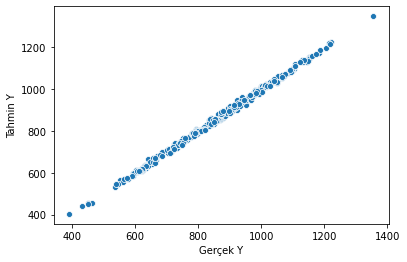

In [98]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y",data =tahminDF)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
mean_absolute_error(tahminDF["Gerçek Y"],tahminDF["Tahmin Y"]) # fiyatlarda 7 lira sapma olduğunu gösterir

7.041125948617422

In [101]:
mean_squared_error(tahminDF["Gerçek Y"],tahminDF["Tahmin Y"])

77.18049247556164

In [102]:
dataframe.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [121]:
yeniBisikletOzellikleri =[[1745,1749]] # eklenen yeni verinin tahmini fiyatı ne olur ona bakalım

In [122]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [123]:
model.predict (yeniBisikletOzellikleri)

array([[587.1514]], dtype=float32)

In [124]:
from tensorflow.keras.models import load_model

In [125]:
model.save("bisiklet_modeli.h5") #modelimi kaydedebiliriz

In [126]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5") # ve sonradan çağırıp tekrar kullanabiliriz

In [127]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

array([[587.1514]], dtype=float32)